In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

# **MIMIC**

## **Loading data and creating Signals objects**

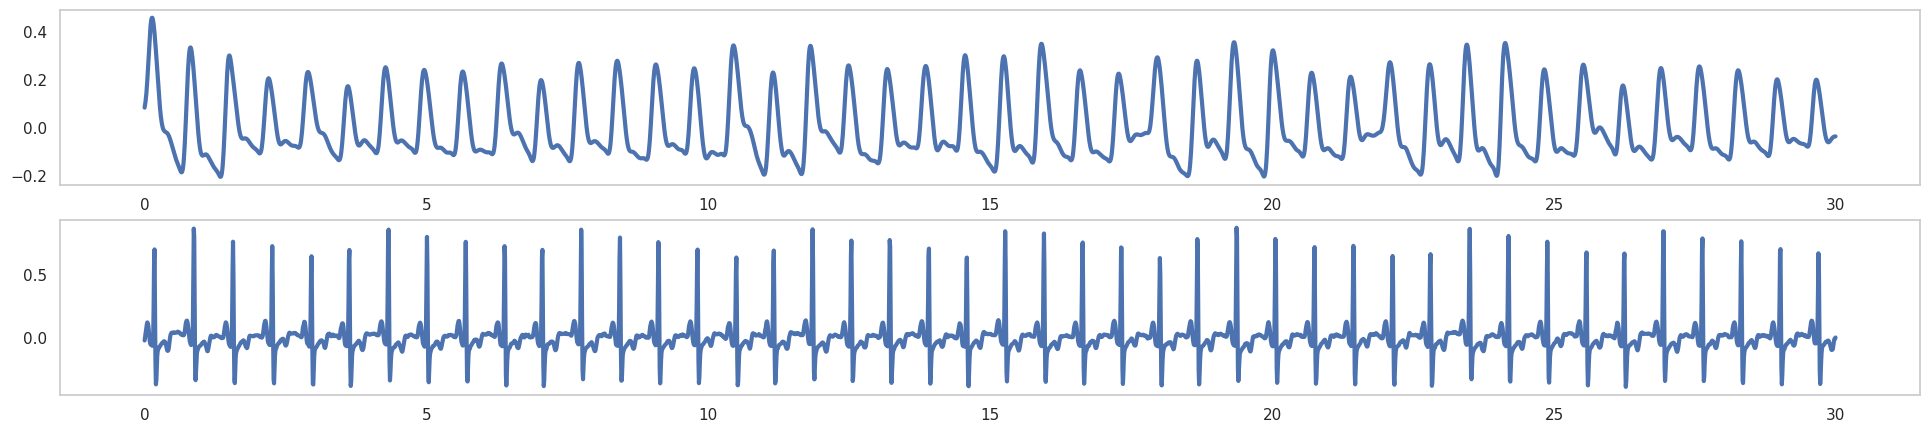

In [9]:
from msr.data.download.mimic import load_mimic_raw_tensors_for_split, FS
from msr.data.measurements import MimicMeasurement

data, targets = load_mimic_raw_tensors_for_split("val", "sbp_dbp_avg")
data, targets = data.numpy(), targets.numpy()
sample = data[222]
sample = sample[:4000]
ppg, ecg = sample.T
measurement = MimicMeasurement(ppg, ecg, FS)
measurement.set_beats(source_channel='ecg', align_to_peak=True)
measurement.set_agg_beat()
ecg_sig = measurement['ecg']

fig, axes = plt.subplots(2, 1, figsize=(24, 5))
measurement.plot(0, 30, axes=axes)

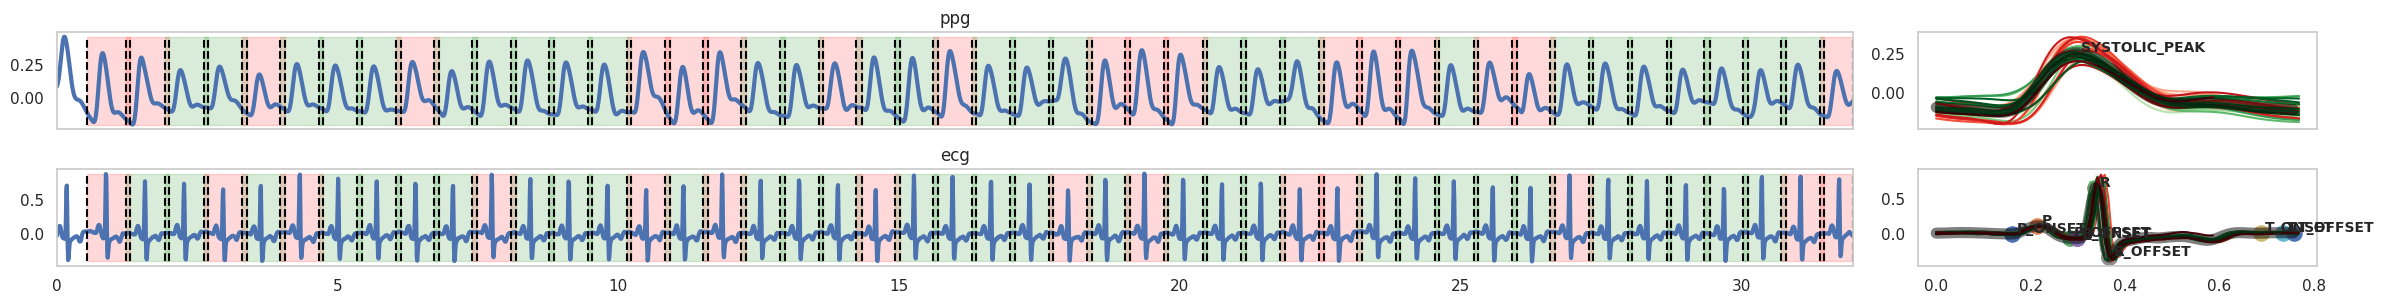

In [12]:
fig = measurement.plot_beats_segmentation(invalid=True, color_validity=True)

In [14]:
fig.savefig("plots/mimic_signals.pdf")